In [ ]:
pip install ucimlrepo

**import database**

Streaming output truncated to the last 5000 lines.
Percentage Correct After Training:  43.10  42.43
Percentage Correct After Training:  43.10  42.43
Percentage Correct After Training:  56.90  57.57
Percentage Correct After Training:  43.10  42.43
Percentage Correct After Training:  56.90  57.57
Percentage Correct After Training:  56.90  57.57
Percentage Correct After Training:  43.10  42.43
Percentage Correct After Training:  56.90  57.57
Percentage Correct After Training:  43.10  42.43
Percentage Correct After Training:  43.10  42.43
Percentage Correct After Training:  43.10  42.43
Percentage Correct After Training:  56.90  57.57
Percentage Correct After Training:  43.10  42.43
Percentage Correct After Training:  43.10  42.43
Percentage Correct After Training:  56.90  57.57
Percentage Correct After Training:  56.90  57.57
Percentage Correct After Training:  43.10  42.43
Percentage Correct After Training:  56.90  57.57
Percentage Correct After Training:  43.10  42.43
Percentage Correct

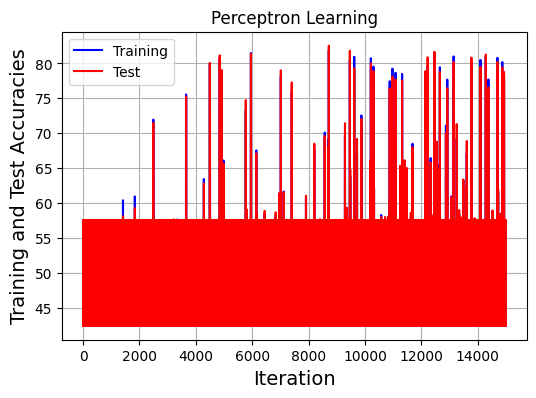

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets


# metadata
# print(rice_cammeo_and_osmancik.metadata)

# # variable information
# print(rice_cammeo_and_osmancik.variables)

x_array = X.values
y_array = y.values

combined_data = np.column_stack((x_array, y_array))

print(combined_data)

np.random.shuffle(combined_data)
print(combined_data)


x_array= combined_data[:, :-1]  # All rows, all columns except the last one
y_array = combined_data[:, -1]  # All rows, only the last column


print(x_array)
# print(y_array)

y_array = np.where(y_array == ['Cammeo'], 1, -1)

# create y array

# +1 = Cammeo
# -1 = Osmancik
print(y_array)

dataset_size = 3810
N_train = 2000

# devide training set and test set.

x_train = x_array[0: N_train]
y_train = y_array[0: N_train]

x_test = x_array[N_train: dataset_size]
y_test = y_array[N_train: dataset_size]


def PercentCorrect(Inputs, targets, weights):
  N = len(targets)
  nCorrect = 0
  for n in range(N):
    OneInput = Inputs[n,:]
    if (targets[n] * np.dot(OneInput, weights) > 0):
      nCorrect += 1

  return 100*nCorrect/N

# We are going to try 1000 iterations.

num_iter = 15000

# learning rate
alpha = 0.0001

# initaiate w values.
w = np.random.randn(7)
print(w)

# To store percentage correct values
P_train = np.zeros(num_iter)
P_test = np.zeros(num_iter)

print(y_train)

for n in range(num_iter):

  # r =  a value betwennn 0 -> 1600.
  r = np.floor(np.random.rand() * N_train).astype(int)

  x = x_train[r, :]
  # print(x)

  # print(y_train[r])

  if (y_train[r] * np.dot(x, w) < 0):

    # np.dot(x, w), y_train[r] both of should be same sign if prediction is correct.
    # np.dot(x, w) ->  this is the prediction.
    # otherwise, we have to change the w.

    # print(w)
    # print(w + alpha * y_train[r] * x)

    w = w + alpha * y_train[r] * x

  P_train[n] = PercentCorrect(x_train, y_train, w);
  P_test[n] = PercentCorrect(x_test, y_test, w);
  print('Percentage Correct After Training: %6.2f %6.2f' % (PercentCorrect(x_train, y_train, w), PercentCorrect(x_test, y_test, w)))

import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(num_iter), P_train, 'b', label = "Training")
ax.plot(range(num_iter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')

